In [85]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd

In [21]:
df.columns

Index(['lib', 'n_site', 'numb_measured', 'percent_measured', 'numb_active',
       'percent_active', 'active_fit_min', 'parent_fit', 'parent_rank', 'mean',
       ...
       'esmif_top96_SSM_delta', 'ev_single_step_DE_delta',
       'ev_recomb_SSM_delta', 'ev_top96_SSM_delta',
       'numb_loc_opt_norm_cannot_escape', 'frac_loc_opt_norm_cannot_escape',
       'norm_non-magnitude', 'norm_reciprocal-sign', 'delta_ft_mlde',
       'delta_ft_de'],
      dtype='object', length=109)

In [54]:
import numpy as np

In [56]:
20**4

160000

In [73]:
df.columns.values

array(['lib', 'n_site', 'numb_measured', 'percent_measured',
       'numb_active', 'percent_active', 'active_fit_min', 'parent_fit',
       'parent_rank', 'mean', 'std', 'range', 'iqr', 'std_dev',
       'variance', 'skewness', 'kurt', 'quartiles', 'loc', 'scale',
       'peaks', 'peak_kde', 'percentiles', 'pdf_values',
       'parent_rank_percent', 'Q1', 'Q2', 'Q3', 'numb_kde_peak',
       'numb_loc_opt', 'frac_loc_opt_active', 'frac_loc_opt_total',
       'frac_loc_opt_hd2_escape_numb',
       'frac_loc_opt_hd2_cannot_escape_numb', 'single_step_DE_max',
       'single_step_DE_mean_all', 'single_step_DE_median_all',
       'single_step_DE_mean_top96', 'single_step_DE_median_top96',
       'single_step_DE_mean_top384', 'single_step_DE_median_top384',
       'single_step_DE_fraction_max', 'single_step_DE_numb_path',
       'recomb_SSM_max', 'recomb_SSM_mean_all', 'recomb_SSM_median_all',
       'recomb_SSM_mean_top96', 'recomb_SSM_median_top96',
       'recomb_SSM_mean_top384', 'recomb_

In [87]:
df = pd.read_csv("results/corr/384/boosting|ridge-top96/merge_all.csv")
smalldf = df[["lib", "n_site", "numb_measured", "percent_measured", "numb_active", "percent_active", "numb_loc_opt", "fraction_non-magnitude", "norm_non-magnitude"]]
smalldf["actopt"] = smalldf["numb_active"] / smalldf["numb_loc_opt"] / np.log(smalldf["numb_measured"])
smalldf.sort_values(by=["actopt"]).style.background_gradient(cmap="YlGnBu")

/tmp/ipykernel_2247716/2892728479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smalldf["actopt"] = smalldf["numb_active"] / smalldf["numb_loc_opt"] / np.log(smalldf["numb_measured"])


,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,numb_loc_opt,fraction_non-magnitude,norm_non-magnitude,actopt
5,TrpB3B,3.000000,7996.000000,99.950000,18.000000,0.225113,12,0.542857,0.122204,0.166913
11,TrpB3H,3.000000,7716.000000,96.450000,53.000000,0.686884,29,0.617486,0.424142,0.204176
6,TrpB3C,3.000000,7994.000000,99.925000,35.000000,0.437828,18,0.592463,0.259397,0.216375
4,TrpB3A,3.000000,7971.000000,99.637500,59.000000,0.740183,23,0.603220,0.446493,0.285546
8,TrpB3E,3.000000,7964.000000,99.550000,161.000000,2.021597,56,0.626425,1.266380,0.320060
9,TrpB3F,3.000000,7737.000000,96.712500,82.000000,1.059842,19,0.536126,0.568209,0.482008
10,TrpB3G,3.000000,7891.000000,98.637500,108.000000,1.368648,23,0.519423,0.710907,0.523281
13,TrpB4,4.000000,159129.000000,99.455625,9783.000000,6.147842,553,0.460855,2.833262,1.477004
7,TrpB3D,3.000000,7763.000000,97.037500,719.000000,9.261883,31,0.495384,4.588191,2.589397
3,GB1,4.000000,149361.000000,93.350625,34545.000000,23.128528,178,0.401187,9.278868,16.289328


In [78]:
df = pd.read_csv("results/corr/384/boosting|ridge-top96/merge_all.csv")
smalldf = df[["lib", "n_site", "numb_measured", "percent_measured", "numb_active", "percent_active", "numb_loc_opt", "fraction_non-magnitude", "norm_non-magnitude"]]
smalldf["actopt"] = smalldf["numb_active"] / smalldf["numb_loc_opt"] / smalldf["fraction_non-magnitude"] / np.log(smalldf["numb_measured"])
smalldf.sort_values(by=["actopt"]).style.background_gradient(cmap="YlGnBu")

/tmp/ipykernel_2247716/2538523012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smalldf["actopt"] = smalldf["numb_active"] / smalldf["numb_loc_opt"] / smalldf["fraction_non-magnitude"] / np.log(smalldf["numb_measured"])


,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,numb_loc_opt,fraction_non-magnitude,norm_non-magnitude,actopt
5,TrpB3B,3.000000,7996.000000,99.950000,18.000000,0.225113,12,0.542857,0.122204,0.307472
11,TrpB3H,3.000000,7716.000000,96.450000,53.000000,0.686884,29,0.617486,0.424142,0.330656
6,TrpB3C,3.000000,7994.000000,99.925000,35.000000,0.437828,18,0.592463,0.259397,0.365213
4,TrpB3A,3.000000,7971.000000,99.637500,59.000000,0.740183,23,0.603220,0.446493,0.473369
8,TrpB3E,3.000000,7964.000000,99.550000,161.000000,2.021597,56,0.626425,1.266380,0.510931
9,TrpB3F,3.000000,7737.000000,96.712500,82.000000,1.059842,19,0.536126,0.568209,0.899058
10,TrpB3G,3.000000,7891.000000,98.637500,108.000000,1.368648,23,0.519423,0.710907,1.007427
13,TrpB4,4.000000,159129.000000,99.455625,9783.000000,6.147842,553,0.460855,2.833262,3.204925
7,TrpB3D,3.000000,7763.000000,97.037500,719.000000,9.261883,31,0.495384,4.588191,5.227047
3,GB1,4.000000,149361.000000,93.350625,34545.000000,23.128528,178,0.401187,9.278868,40.602815


In [38]:
de_df = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")
for de in de_df["de_type"].unique():
    print(de)
    print(de_df[de_df["de_type"] == de].sort_values(by=["mean_all"])["lib"].values)
    # print(de_df[de_df["de_type"] == de].sort_values(by=["median_all"])["lib"].values)

single_step_DE
['TrpB3B' 'TrpB3E' 'TrpB3H' 'TrpB3C' 'TrpB3A' 'GB1' 'TrpB4' 'TrpB3G'
 'TrpB3F' 'TrpB3D' 'TrpB3I' 'DHFR' 'ParD2' 'ParD3']
recomb_SSM
['TrpB3E' 'TrpB3B' 'TrpB3H' 'GB1' 'TrpB3C' 'TrpB3A' 'TrpB4' 'TrpB3G'
 'TrpB3D' 'TrpB3F' 'TrpB3I' 'DHFR' 'ParD2' 'ParD3']
top96_SSM
['TrpB3B' 'TrpB3E' 'TrpB3C' 'TrpB3H' 'TrpB3A' 'GB1' 'TrpB4' 'TrpB3G'
 'TrpB3F' 'TrpB3D' 'TrpB3I' 'DHFR' 'ParD3' 'ParD2']


In [82]:
smalldf.sort_values(by=["actopt"])["lib"].values[::-1]

array(['ParD3', 'ParD2', 'DHFR', 'TrpB3I', 'GB1', 'TrpB3D', 'TrpB4',
       'TrpB3G', 'TrpB3F', 'TrpB3E', 'TrpB3A', 'TrpB3C', 'TrpB3H',
       'TrpB3B'], dtype=object)

In [ ]:
df = pd.read_csv("results/corr/384/boosting|ridge-top96/merge_all.csv")
smalldf = df[["lib", "n_site", "numb_active", "percent_active", "numb_loc_opt", "fraction_non-magnitude", "norm_non-magnitude"]]
smalldf["actopt"] = smalldf["numb_active"] / smalldf["numb_loc_opt"] / smalldf["fraction_non-magnitude"] / (smalldf["n_site"]*20)
smalldf.sort_values(by=["actopt"]).style.background_gradient(cmap="YlGnBu")

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
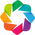

Loading BokehJS ...

Loading BokehJS ...

In [3]:
"""A script for getting all results into a summary"""

from glob import glob
from tqdm import tqdm

import pandas as pd
import numpy as np

from ast import literal_eval

from scipy.stats import spearmanr

import bokeh
from bokeh.io import show, export_svg, export_png, output_notebook
from bokeh.plotting import show, figure
from bokeh.themes.theme import Theme


import holoviews as hv
from holoviews import opts, dim

from SSMuLA.landscape_global import get_file_name
from SSMuLA.zs_analysis import ZS_OPTS
from SSMuLA.vis import LIB_COLORS


output_notebook()
bokeh.io.output_notebook()

hv.extension("bokeh", "matplotlib")


########## lib stat ##########
lib_stat = pd.read_csv(
    "results/fitness_distribution/max/all_lib_stats.csv", index_col=0
)
lib_stat_all = lib_stat[lib_stat["n_mut_cuttoff"] == 0]

lib_df = pd.concat(
    [
        lib_stat_all["lib"],
        lib_stat_all["lib_basic_dict"].apply(literal_eval).apply(pd.Series),
        lib_stat_all["fit_basic_dict"].apply(literal_eval).apply(pd.Series),
        lib_stat_all["cauchy"].apply(literal_eval).apply(pd.Series),
        lib_stat_all["kde"].apply(literal_eval).apply(pd.Series),
    ],
    axis=1,
)
lib_df["parent_rank_percent"] = lib_df["parent_rank"] / lib_df["numb_measured"]
# qs = pd.DataFrame(lib_df['quartiles'].tolist(), index=lib_df.index)
# qs.columns =   # Rename columns

df_expanded = lib_df["quartiles"].apply(pd.Series)
df_expanded.columns = ["Q1", "Q2", "Q3"]  # Rename columns
df_expanded["numb_kde_peak"] = lib_df["peak_kde"].apply(len)

lib_df = pd.concat([lib_df, df_expanded], axis=1)


########## loc opt ##########

loc_opt_list = glob("results/local_optima/scale2max/*.csv")
loc_opt_df = pd.DataFrame()

for lo in loc_opt_list:
    lo_df = pd.read_csv(lo)
    loc_opt_df = loc_opt_df._append(
        {
            "lib": get_file_name(lo).replace("_loc_opt_escape", ""),
            "n_locopt": len(lo_df),
        },
        ignore_index=True,
    )

########## de stat ##########

de_df = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")
# clean up the nan if not full N
# Fill NaNs in 'mean_top96' and 'median_top96' from 'mean_all' and 'median_all'
de_df["mean_top96"] = de_df["mean_top96"].fillna(de_df["mean_all"])
de_df["median_top96"] = de_df["median_top96"].fillna(de_df["median_all"])

# Fill NaNs in 'mean_top384' and 'median_top384' from 'mean_top96' and 'median_top96'
de_df["mean_top384"] = de_df["mean_top384"].fillna(de_df["mean_top96"])
de_df["median_top384"] = de_df["median_top384"].fillna(de_df["median_top96"])

de_types = de_df["de_type"].unique()

de_df_cols = list(de_df.columns)

de_df_concat = pd.DataFrame({"lib": list(de_df["lib"].unique())})

for de_type in de_types:

    sliced_de_df = de_df[de_df["de_type"] == de_type]

    for de_df_col in de_df_cols:
        if de_df_col not in ["lib", "de_type"]:
            sliced_de_df = sliced_de_df.rename(
                columns={de_df_col: f"{de_type}_{de_df_col}"}
            )

    de_df_concat = pd.merge(
        de_df_concat, sliced_de_df.drop(["de_type"], axis=1), on="lib"
    )


########## mlde stat ##########

mlde_df = pd.read_csv("results/mlde/vis_4/all_df.csv")

mlde_avg = (
    mlde_df[
        (mlde_df["zs"] == "none")
        & (mlde_df["encoding"] == "one-hot")
        & (mlde_df["model"] == "boosting")
        & (mlde_df["n_mut_cutoff"] == "all")
        & (mlde_df["n_sample"] == 288)
        & (mlde_df["n_top"] == 96)
    ][["lib", "top_maxes", "top_means", "ndcgs", "rhos", "if_truemaxs"]]
    .groupby("lib")
    .mean()
)

zs_simpele = [zs.split("_score")[0] for zs in mlde_df["zs"].unique() if "score" in zs]

for zs in zs_simpele:

    rename_cols = {
        "top_maxes": f"maxes_{zs}",
        "top_means": f"means_{zs}",
        "ndcgs": f"ndcgs_{zs}",
        "rhos": f"rhos_{zs}",
        "if_truemaxs": f"if_truemaxs_{zs}",
    }

    mlde_avg = pd.merge(
        mlde_avg,
        (
            mlde_df[
                (mlde_df["zs"] == f"{zs}_score")
                & (mlde_df["encoding"] == "one-hot")
                & (mlde_df["model"] == "boosting")
                & (mlde_df["n_mut_cutoff"] == "all")
                & (mlde_df["n_sample"] == 288)
                & (mlde_df["n_top"] == 96)
            ][["lib", "top_maxes", "top_means", "ndcgs", "rhos", "if_truemaxs"]]
            .groupby("lib")
            .mean()
            .rename(columns=rename_cols)
        ),
        on="lib",
    )

merged_active_de = pd.merge(lib_df, de_df_concat, on="lib")
simple_merge = pd.merge(merged_active_de, mlde_avg, on="lib")
simple_merge = pd.merge(simple_merge, loc_opt_df, on="lib")

##### calc delta #####
for ft_col in [""] + zs_simpele:
    for de in de_types:
        if ft_col == "":
            simple_merge[f"mlde_{de}_delta"] = (
                simple_merge["top_maxes"] - simple_merge[f"{de}_mean_all"]
            )
        else:
            simple_merge[f"{ft_col}_{de}_delta"] = (
                simple_merge[f"maxes_{ft_col}"] - simple_merge[f"{de}_mean_all"]
            )


####### epistasis #######

df_pw = pd.read_csv("results/pairwise_epistasis_vis/none/scale2max.csv")

df_pw_s_rs = (
    df_pw[
        (df_pw["n_mut"] == "all")
        & (df_pw["summary_type"] == "fraction")
        & (df_pw["epistasis_type"] != "magnitude")
    ][["lib", "value"]]
    .groupby("lib")
    .sum()
    .rename(columns={"value": "fraction_non-magnitude"})
)

df_pw_rs = df_pw[
    (df_pw["n_mut"] == "all")
    & (df_pw["summary_type"] == "fraction")
    & (df_pw["epistasis_type"] == "reciprocal sign")
][["lib", "value"]].rename(columns={"value": "fraction_reciprocal-sign"})

df_pw = pd.merge(df_pw_s_rs, df_pw_rs, on="lib")

simple_merge_pw = pd.merge(simple_merge, df_pw, on="lib")

simple_merge_pw["norm_non-magnitude"] = (
    simple_merge_pw["fraction_non-magnitude"] * simple_merge_pw["percent_active"]
)
simple_merge_pw["norm_reciprocal-sign"] = (
    simple_merge_pw["fraction_reciprocal-sign"] * simple_merge_pw["percent_active"]
)
simple_merge_pw["delta_ft_mlde"] = (
    np.maximum.reduce([
        simple_merge_pw["maxes_Triad"],
        simple_merge_pw["maxes_ev"],
        simple_merge_pw["maxes_esm"],
        simple_merge_pw["maxes_esmif"]
    ])
    - simple_merge_pw["top_maxes"]
)
simple_merge_pw["delta_ft_de"] = (
    np.maximum.reduce([
        simple_merge_pw["maxes_Triad"],
        simple_merge_pw["maxes_ev"],
        simple_merge_pw["maxes_esm"],
        simple_merge_pw["maxes_esmif"]
    ])
    - simple_merge_pw["recomb_SSM_mean_all"]
)

In [ ]:
[c for c in simple_merge_pw.columns if "comb" in c]

['recomb_SSM_max',
 'recomb_SSM_mean_all',
 'recomb_SSM_median_all',
 'recomb_SSM_mean_top96',
 'recomb_SSM_median_top96',
 'recomb_SSM_mean_top384',
 'recomb_SSM_median_top384',
 'recomb_SSM_fraction_max',
 'recomb_SSM_numb_path',
 'maxes_msa-comb',
 'means_msa-comb',
 'ndcgs_msa-comb',
 'rhos_msa-comb',
 'if_truemaxs_msa-comb',
 'maxes_msanoif-comb',
 'means_msanoif-comb',
 'ndcgs_msanoif-comb',
 'rhos_msanoif-comb',
 'if_truemaxs_msanoif-comb',
 'maxes_struc-comb',
 'means_struc-comb',
 'ndcgs_struc-comb',
 'rhos_struc-comb',
 'if_truemaxs_struc-comb',
 'maxes_structnmsa-comb',
 'means_structnmsa-comb',
 'ndcgs_structnmsa-comb',
 'rhos_structnmsa-comb',
 'if_truemaxs_structnmsa-comb',
 'mlde_recomb_SSM_delta',
 'Triad_recomb_SSM_delta',
 'esm_recomb_SSM_delta',
 'esmif_recomb_SSM_delta',
 'ev_recomb_SSM_delta',
 'msa-comb_single_step_DE_delta',
 'msa-comb_recomb_SSM_delta',
 'msa-comb_top96_SSM_delta',
 'msanoif-comb_single_step_DE_delta',
 'msanoif-comb_recomb_SSM_delta',
 'msanoif

In [ ]:
mlde_df["zs"]

0                    Triad_score
1                    Triad_score
2                    Triad_score
3                    Triad_score
4                    Triad_score
                   ...          
1817195    structnmsa-comb_score
1817196    structnmsa-comb_score
1817197    structnmsa-comb_score
1817198    structnmsa-comb_score
1817199    structnmsa-comb_score
Name: zs, Length: 1817200, dtype: object

In [7]:
loc_df = pd.read_csv("results/local_optima/scale2max.csv")
loc_df

,lib,summary_type,frac_measured,numb_active,frac_active,numb_loc_opt,frac_loc_opt_active,frac_loc_opt_total,frac_loc_opt_hd2_escape_numb,frac_loc_opt_hd2_cannot_escape_numb
0,DHFR,scale2max,1.000000,854,0.106750,3,0.003513,0.000375,0.666667,0.333333
1,GB1,scale2max,0.933506,34545,0.231285,178,0.005153,0.001192,0.988764,0.011236
2,ParD2,scale2max,0.985250,6533,0.828851,5,0.000765,0.000634,0.800000,0.200000
3,ParD3,scale2max,0.985250,7248,0.919564,4,0.000552,0.000507,0.750000,0.250000
4,TrpB3A,scale2max,0.996375,59,0.007402,23,0.389831,0.002885,0.869565,0.130435
5,TrpB3B,scale2max,0.999500,18,0.002251,12,0.666667,0.001501,0.750000,0.250000
6,TrpB3C,scale2max,0.999250,35,0.004378,18,0.514286,0.002252,0.777778,0.222222
7,TrpB3D,scale2max,0.970375,719,0.092619,31,0.043115,0.003993,0.903226,0.096774
8,TrpB3E,scale2max,0.995500,161,0.020216,56,0.347826,0.007032,0.946429,0.053571
9,TrpB3F,scale2max,0.967125,82,0.010598,19,0.231707,0.002456,0.947368,0.052632


In [12]:
df_192 = pd.read_csv("results/corr/192/boosting-top96/merge_all.csv")
df_192

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,esmif_top96_SSM_delta,ev_single_step_DE_delta,ev_recomb_SSM_delta,ev_top96_SSM_delta,numb_loc_opt_norm_cannot_escape,frac_loc_opt_norm_cannot_escape,norm_non-magnitude,norm_reciprocal-sign,delta_ft_mlde,delta_ft_de
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.017043,0.093518,0.131977,0.024135,1.0,0.000125,4.465397,0.205829,0.027901,0.131977
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,0.009941,0.039798,0.053347,0.010077,1.0,0.000127,28.445324,5.735556,0.001049,0.053580
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,0.002435,0.012888,0.023637,0.004570,1.0,0.000127,28.665219,5.172631,0.004565,0.023637
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.085539,0.118108,0.326704,0.078284,2.0,0.000013,9.278868,1.678579,0.119438,0.350257
4,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.222995,0.293963,0.294019,0.266359,3.0,0.000376,0.446493,0.164719,0.337687,0.363968
5,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.053386,0.069665,0.069665,0.066898,3.0,0.000375,0.122204,0.057886,0.065051,0.069665
6,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.129346,0.078637,0.077022,0.072012,4.0,0.000500,0.259397,0.101303,0.169452,0.134356
7,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.050811,0.212175,0.305125,0.070098,3.0,0.000386,4.588191,1.260749,0.074150,0.305125
8,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.493234,0.537381,0.567127,0.504441,3.0,0.000377,1.266380,0.510114,0.300824,0.567127
9,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,0.163843,0.284787,0.324619,0.195611,1.0,0.000129,0.568209,0.195413,0.040063,0.324619


In [20]:
np.maximum.reduce(
                [
                    df_192["maxes_Triad"],
                    df_192["maxes_ev"],
                    df_192["maxes_esm"],
                    df_192["maxes_esmif"],
                ]
            )

array([0.98343977, 0.99982543, 0.99279921, 0.71318414, 0.76522402,
       0.34098413, 0.50881373, 0.95302823, 0.81711925, 0.97820616,
       0.92068923, 0.67624227, 0.98555152, 0.79230298])

In [17]:
df_192[["lib", "single_step_DE_mean_all", "recomb_SSM_mean_all", ""]]

,lib,single_step_DE_mean_all,recomb_SSM_mean_all
0,DHFR,0.889922,0.851463
1,ParD2,0.959795,0.946246
2,ParD3,0.979911,0.969163
3,GB1,0.571523,0.362927
4,TrpB3A,0.401312,0.401256
5,TrpB3B,0.271319,0.271319
6,TrpB3C,0.372843,0.374458
7,TrpB3D,0.740853,0.647904
8,TrpB3E,0.279738,0.249992
9,TrpB3F,0.693419,0.653587


In [22]:
corr_df_192 = pd.read_csv("results/corr/192/boosting-top96/corr.csv")
corr_df_192[["descriptor", "delta_ft_mlde"]]

,descriptor,delta_ft_mlde
0,percent_active,-0.657143
1,parent_rank_percent,-0.424176
2,mean,-0.701099
3,std,-0.683516
4,range,0.432967
5,iqr,-0.380220
6,std_dev,-0.762637
7,variance,-0.762637
8,skewness,0.472527
9,kurt,0.701099


In [8]:
loc_df[[col for col in loc_df.columns if 'lib' in col or 'loc_opt' in col]]

,lib,numb_loc_opt,frac_loc_opt_active,frac_loc_opt_total,frac_loc_opt_hd2_escape_numb,frac_loc_opt_hd2_cannot_escape_numb
0,DHFR,3,0.003513,0.000375,0.666667,0.333333
1,GB1,178,0.005153,0.001192,0.988764,0.011236
2,ParD2,5,0.000765,0.000634,0.800000,0.200000
3,ParD3,4,0.000552,0.000507,0.750000,0.250000
4,TrpB3A,23,0.389831,0.002885,0.869565,0.130435
5,TrpB3B,12,0.666667,0.001501,0.750000,0.250000
6,TrpB3C,18,0.514286,0.002252,0.777778,0.222222
7,TrpB3D,31,0.043115,0.003993,0.903226,0.096774
8,TrpB3E,56,0.347826,0.007032,0.946429,0.053571
9,TrpB3F,19,0.231707,0.002456,0.947368,0.052632


In [4]:
simple_corr_df = pd.DataFrame()

for des in [
    "percent_active",
    "parent_rank_percent",
    # "parent_rank",
    "mean",
    "std",
    "range",
    "iqr",
    "std_dev",
    "variance",
    "skewness",
    "kurt",
    "loc",
    "scale",
    "numb_kde_peak",
    "Q1",
    "Q2",
    "Q3",
    "n_locopt",
    "fraction_non-magnitude",
    "fraction_reciprocal-sign",
    "norm_non-magnitude",
    "norm_reciprocal-sign",
]:

    simple_corr_row = {"descriptor": des}

    for val in ['single_step_DE_mean_all', 'single_step_DE_median_all',
       'single_step_DE_mean_top96', 'single_step_DE_median_top96',
       'single_step_DE_mean_top384', 'single_step_DE_median_top384',
       'single_step_DE_fraction_max', 'recomb_SSM_mean_all',
       'recomb_SSM_median_all', 'recomb_SSM_mean_top96',
       'recomb_SSM_median_top96', 'recomb_SSM_mean_top384',
       'recomb_SSM_median_top384', 'recomb_SSM_fraction_max',
       'top96_SSM_mean_all', 'top96_SSM_median_all', 'top96_SSM_mean_top96',
       'top96_SSM_median_top96', 'top96_SSM_mean_top384',
       'top96_SSM_median_top384', 'top96_SSM_fraction_max', 'top_maxes',
       'top_means', 'ndcgs', 'rhos', 'if_truemaxs', 'maxes_Triad',
       'means_Triad', 'ndcgs_Triad', 'rhos_Triad', 'if_truemaxs_Triad',
       'maxes_ev', 'means_ev', 'ndcgs_ev', 'rhos_ev', 'if_truemaxs_ev',
       'maxes_esm', 'means_esm', 'ndcgs_esm', 'rhos_esm', 'if_truemaxs_esm',
       'maxes_esmif', 'means_esmif', 'ndcgs_esmif', 'rhos_esmif', 'if_truemaxs_esmif',
       'n_locopt', 'mlde_single_step_DE_delta', 'mlde_recomb_SSM_delta',
       'mlde_top96_SSM_delta', 'Triad_single_step_DE_delta',
       'Triad_recomb_SSM_delta', 'Triad_top96_SSM_delta',
       'ev_single_step_DE_delta', 'ev_recomb_SSM_delta', 'ev_top96_SSM_delta',
       'esm_single_step_DE_delta', 'esm_recomb_SSM_delta',
       'esm_top96_SSM_delta',
       'esmif_single_step_DE_delta', 'esmif_recomb_SSM_delta',
       'esmif_top96_SSM_delta',
       "delta_ft_mlde", "delta_ft_de"]:
        
        simple_corr_row[val] = spearmanr(simple_merge_pw[des], simple_merge_pw[val])[0]

    simple_corr_df = simple_corr_df._append(
        simple_corr_row,
        ignore_index=True,
    )

display(simple_corr_df.round(3).style.background_gradient(cmap="YlGnBu"))

,descriptor,single_step_DE_mean_all,single_step_DE_median_all,single_step_DE_mean_top96,single_step_DE_median_top96,single_step_DE_mean_top384,single_step_DE_median_top384,single_step_DE_fraction_max,recomb_SSM_mean_all,recomb_SSM_median_all,recomb_SSM_mean_top96,recomb_SSM_median_top96,recomb_SSM_mean_top384,recomb_SSM_median_top384,recomb_SSM_fraction_max,top96_SSM_mean_all,top96_SSM_median_all,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top_maxes,top_means,ndcgs,rhos,if_truemaxs,maxes_Triad,means_Triad,ndcgs_Triad,rhos_Triad,if_truemaxs_Triad,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev,maxes_esm,means_esm,ndcgs_esm,rhos_esm,if_truemaxs_esm,maxes_esmif,means_esmif,ndcgs_esmif,rhos_esmif,if_truemaxs_esmif,n_locopt,mlde_single_step_DE_delta,mlde_recomb_SSM_delta,mlde_top96_SSM_delta,Triad_single_step_DE_delta,Triad_recomb_SSM_delta,Triad_top96_SSM_delta,ev_single_step_DE_delta,ev_recomb_SSM_delta,ev_top96_SSM_delta,esm_single_step_DE_delta,esm_recomb_SSM_delta,esm_top96_SSM_delta,esmif_single_step_DE_delta,esmif_recomb_SSM_delta,esmif_top96_SSM_delta,delta_ft_mlde,delta_ft_de
0,percent_active,0.820000,0.649000,0.798000,0.609000,0.852000,0.609000,0.279000,0.705000,0.705000,0.832000,0.840000,0.930000,0.807000,-0.455000,0.820000,0.647000,0.922000,0.709000,0.931000,0.709000,0.226000,0.842000,0.947000,-0.059000,0.727000,0.223000,0.666000,0.947000,-0.464000,0.780000,0.059000,0.771000,0.947000,0.007000,0.758000,0.226000,0.670000,0.947000,0.024000,0.758000,0.191000,0.802000,0.947000,-0.235000,0.758000,0.150000,-0.205000,0.073000,0.160000,-0.121000,-0.429000,-0.349000,-0.640000,-0.451000,-0.279000,-0.670000,-0.495000,-0.385000,-0.741000,-0.402000,-0.319000,-0.648000,-0.701000,-0.363000
1,parent_rank_percent,0.569000,0.400000,0.757000,0.609000,0.782000,0.609000,0.051000,0.437000,0.429000,0.759000,0.757000,0.701000,0.587000,-0.486000,0.591000,0.524000,0.857000,0.689000,0.876000,0.689000,0.191000,0.556000,0.745000,-0.657000,0.398000,0.150000,0.319000,0.745000,-0.837000,0.464000,-0.185000,0.477000,0.745000,-0.591000,0.411000,0.125000,0.385000,0.745000,-0.574000,0.442000,0.073000,0.525000,0.745000,-0.705000,0.446000,0.068000,0.066000,0.240000,0.367000,-0.064000,-0.262000,-0.099000,-0.503000,-0.222000,0.029000,-0.411000,-0.262000,-0.086000,-0.503000,-0.147000,-0.024000,-0.411000,-0.393000,-0.081000
2,mean,0.811000,0.612000,0.752000,0.602000,0.852000,0.602000,0.301000,0.714000,0.679000,0.858000,0.789000,0.899000,0.758000,-0.429000,0.824000,0.620000,0.899000,0.638000,0.908000,0.638000,0.284000,0.815000,0.965000,-0.103000,0.635000,0.240000,0.613000,0.965000,-0.516000,0.697000,-0.026000,0.785000,0.965000,-0.051000,0.644000,0.253000,0.675000,0.965000,-0.024000,0.670000,0.204000,0.798000,0.965000,-0.292000,0.648000,0.136000,-0.255000,0.002000,0.037000,-0.231000,-0.490000,-0.464000,-0.727000,-0.477000,-0.371000,-0.684000,-0.499000,-0.433000,-0.749000,-0.433000,-0.402000,-0.701000,-0.697000,-0.437000
3,std,0.789000,0.583000,0.752000,0.602000,0.814000,0.602000,0.319000,0.697000,0.648000,0.834000,0.746000,0.859000,0.719000,-0.424000,0.798000,0.598000,0.871000,0.597000,0.878000,0.597000,0.301000,0.793000,0.947000,-0.121000,0.591000,0.262000,0.596000,0.947000,-0.490000,0.653000,-0.042000,0.789000,0.947000,-0.064000,0.591000,0.288000,0.675000,0.947000,-0.029000,0.626000,0.235000,0.798000,0.947000,-0.301000,0.591000,0.161000,-0.268000,0.037000,0.051000,-0.218000,-0.464000,-0.451000,-0.714000,-0.437000,-0.349000,-0.648000,-0.455000,-0.402000,-0.710000,-0.393000,-0.385000,-0.670000,-0.662000,-0.415000
4,range,-0.481000,-0.306000,-0.592000,-0.548000,-0.711000,-0.548000,-0.029000,-0.363000,-0.376000,-0.649000,-0.650000,-0.626000,-0.473000,0.468000,-0.512000,-0.342000,-0.725000,-0.489000,-0.791000,-0.489000,-0.037000,-0.459000,-0.705000,0.521000,-0.319000,0.020000,-0.182000,-0.705000,0.776000,-0.371000,0.376000,-0.415000,-0.705000,0.477000,-0.336000,0.024000,-0.305000,-0.705000,0.459000

In [5]:
display(simple_corr_df[["descriptor", "mlde_recomb_SSM_delta"]].round(3).style.background_gradient(cmap="YlGnBu"))

,descriptor,mlde_recomb_SSM_delta
0,percent_active,0.160000
1,parent_rank_percent,0.367000
2,mean,0.037000
3,std,0.051000
4,range,-0.086000
5,iqr,-0.433000
6,std_dev,-0.319000
7,variance,-0.319000
8,skewness,0.481000
9,kurt,0.407000


In [6]:
display(simple_corr_df[["descriptor", "delta_ft_mlde"]].round(3).style.background_gradient(cmap="YlGnBu"))

,descriptor,delta_ft_mlde
0,percent_active,-0.701000
1,parent_rank_percent,-0.393000
2,mean,-0.697000
3,std,-0.662000
4,range,0.358000
5,iqr,-0.473000
6,std_dev,-0.820000
7,variance,-0.820000
8,skewness,0.547000
9,kurt,0.771000


In [7]:
display(simple_corr_df[["descriptor", "delta_ft_de"]].round(3).style.background_gradient(cmap="YlGnBu"))

,descriptor,delta_ft_de
0,percent_active,-0.363000
1,parent_rank_percent,-0.081000
2,mean,-0.437000
3,std,-0.415000
4,range,0.191000
5,iqr,-0.530000
6,std_dev,-0.736000
7,variance,-0.736000
8,skewness,0.640000
9,kurt,0.763000


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
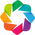

Loading BokehJS ...

In [8]:

import bokeh
from bokeh.io import show, export_svg, export_png
from bokeh.plotting import show
from bokeh.themes.theme import Theme

import holoviews as hv
from holoviews import opts, dim

from SSMuLA.vis import LIB_COLORS, save_bokeh_hv


hv.extension("bokeh", "matplotlib")
bokeh.io.output_notebook()


In [13]:
hv.Scatter(simple_merge_pw, "percent_active", ["delta_ft_mlde", "lib"]).opts(
                marker="o", size=10, color=dim("lib").categorize(LIB_COLORS)
            ).groupby("lib").overlay().opts(
                hv.opts.Scatter(
                    height=400,
                    width=500,
                    # marker="o",
                    size=10,
                    tools=["hover"],
                    show_legend=True,
                    color=dim("lib").categorize(LIB_COLORS),
                    legend_position="right",
                    legend_offset=(5, 0),
                    title="test",
                    logx=True,
                )
            )

:NdOverlay   [lib]
   :Scatter   [percent_active]   (delta_ft_mlde,lib)

In [9]:
for fac in tqdm([
    "percent_active",
    "skewness",
    "kurt",
    "numb_kde_peak",
    "n_locopt",
    "fraction_non-magnitude",
    "fraction_reciprocal-sign",
    "norm_non-magnitude",
    "norm_reciprocal-sign",
]):


    for delta_type, subdir in zip(["mlde_recomb_SSM_delta", "delta_ft_mlde"], ["rules", "rules_ft"]):

        if delta_type == "mlde_recomb_SSM_delta":
            title = f"{fac} vs delta MLDE and DE max fitness achieved"
        else:
            title = f"{fac} vs delta ftMLDE and MLDE max fitness achieved"

        for logx in [True, False]:

            if logx:
                plot_path = f"results/{subdir}/logx/288"
            else:
                plot_path = f"results/{subdir}/288"

            save_bokeh_hv(
                plot_obj=hv.Scatter(simple_merge_pw, fac, [delta_type, "lib"]).opts(
                    marker="o", size=10, color=dim("lib").categorize(LIB_COLORS)
                )
                .groupby("lib")
                .overlay()
                .opts(
                    hv.opts.Scatter(
                        height=400,
                        width=500,
                        marker="o",
                        size=10,
                        tools=["hover"],
                        show_legend=True,
                        color=dim("lib").categorize(LIB_COLORS),
                        legend_position="right",
                        legend_offset=(5, -20),
                        title=title,
                        logx=logx,
                    )
                ),
                plot_name=title,
                plot_path=plot_path,
                bokehorhv="hv",
                dpi=300,
                scale=2,
            )

  0%|          | 0/9 [00:00<?, ?it/s]

Making results/rules/logx/288 ...
Making results/rules/288 ...
Making results/rules_ft/logx/288 ...
Making results/rules_ft/288 ...


100%|██████████| 9/9 [01:07<00:00,  7.55s/it]


In [11]:
mlde_df["model"].unique()

array(['boosting', 'ridge'], dtype=object)

In [4]:
import pandas as pd
corr_df = pd.read_csv("results/corr/384/boosting|ridge-top96/corr.csv")
display(corr_df.round(3).style.background_gradient(cmap="YlGnBu"))

,descriptor,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,parent_rank_percent,mean,std,range,iqr,std_dev,variance,skewness,kurt,loc,scale,numb_kde_peak,Q1,Q2,Q3,numb_loc_opt,frac_loc_opt_total,frac_loc_opt_hd2_escape_numb,frac_loc_opt_hd2_cannot_escape_numb,numb_loc_opt_norm_cannot_escape,frac_loc_opt_norm_cannot_escape,fraction_non-magnitude,fraction_reciprocal-sign,norm_non-magnitude,norm_reciprocal-sign,single_step_DE_mean_all,single_step_DE_median_all,single_step_DE_mean_top96,single_step_DE_median_top96,single_step_DE_mean_top384,single_step_DE_median_top384,single_step_DE_fraction_max,recomb_SSM_mean_all,recomb_SSM_median_all,recomb_SSM_mean_top96,recomb_SSM_median_top96,recomb_SSM_mean_top384,recomb_SSM_median_top384,recomb_SSM_fraction_max,top96_SSM_mean_all,top96_SSM_median_all,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top_maxes,top_means,ndcgs,rhos,if_truemaxs,maxes_Triad,means_Triad,ndcgs_Triad,rhos_Triad,if_truemaxs_Triad,maxes_ev,means_ev,ndcgs_ev,rhos_ev,if_truemaxs_ev,maxes_esm,means_esm,ndcgs_esm,rhos_esm,if_truemaxs_esm,maxes_esmif,means_esmif,ndcgs_esmif,rhos_esmif,if_truemaxs_esmif,mlde_single_step_DE_delta,mlde_recomb_SSM_delta,mlde_top96_SSM_delta,Triad_single_step_DE_delta,Triad_recomb_SSM_delta,Triad_top96_SSM_delta,ev_single_step_DE_delta,ev_recomb_SSM_delta,ev_top96_SSM_delta,esm_single_step_DE_delta,esm_recomb_SSM_delta,esm_top96_SSM_delta,esmif_single_step_DE_delta,esmif_recomb_SSM_delta,esmif_top96_SSM_delta,delta_ft_mlde,delta_ft_de
0,numb_measured,1.000000,0.568000,0.233000,-0.048000,0.189000,-0.311000,0.354000,0.231000,-0.044000,-0.037000,-0.255000,-0.356000,-0.040000,-0.040000,0.119000,0.057000,-0.037000,-0.356000,0.241000,0.079000,-0.037000,-0.141000,0.132000,-0.277000,0.054000,-0.054000,0.303000,-0.533000,-0.141000,-0.062000,-0.088000,-0.110000,-0.246000,-0.239000,-0.080000,-0.307000,0.031000,-0.307000,-0.451000,-0.268000,-0.242000,0.113000,0.227000,0.000000,-0.051000,-0.414000,-0.286000,-0.226000,0.049000,0.044000,0.131000,0.044000,-0.605000,-0.392000,-0.040000,-0.260000,0.114000,-0.608000,-0.673000,0.004000,-0.260000,0.163000,-0.666000,-0.515000,-0.040000,-0.378000,0.128000,-0.563000,-0.506000,-0.040000,-0.330000,0.128000,-0.528000,-0.559000,-0.040000,-0.299000,0.081000,-0.572000,-0.271000,-0.108000,-0.106000,-0.310000,-0.180000,-0.163000,-0.304000,-0.136000,-0.048000,-0.374000,-0.207000,-0.057000,-0.326000,-0.176000,-0.031000,0.229000,-0.136000
1,percent_measured,0.568000,1.000000,-0.348000,-0.321000,0.559000,0.225000,-0.222000,-0.227000,-0.194000,-0.121000,0.229000,0.070000,0.066000,0.066000,-0.216000,-0.084000,-0.121000,0.070000,-0.301000,-0.114000,-0.121000,-0.145000,-0.381000,-0.176000,-0.521000,0.521000,0.190000,0.022000,0.216000,0.238000,-0.365000,-0.414000,-0.207000,-0.195000,-0.353000,-0.509000,-0.345000,-0.509000,0.055000,-0.106000,-0.202000,-0.129000,-0.176000,-0.242000,-0.174000,0.097000,-0.251000,-0.179000,-0.331000,-0.269000,-0.282000,-0.269000,-0.143000,-0.365000,-0.194000,0.224000,0.088000,-0.130000,-0.418000,-0.207000,0.242000,-0.018000,-0.323000,-0.242000,-0.194000,0.088000,-0.053000,-0.062000,-0.233000,-0.194000,0.145000,-0.053000,-0.018000,-0.290000,-0.194000,0.194000,-0.103000,-0.106000,-0.279000,-0.416000,-0.277000,-0.266000,-0.339000,-0.158000,-0.167000,-0.321000,0.000000,-0.119000,-0.308000,0.053000,-0.251000,-0.334000,-0.044000,0.220000,-0.321000
2,numb_active,0.233000,-0.348000,1.000000,0.895000,-0.604000,-0.633000,0.842000,0.811000,0.842000,0.802000,-0.785000,-0.059000,0.486000,0.486000,0.090000,-0.367000,0.802000,-0.059000,0.062000,0.842000,0.802000,0.767000,0.134000,-0.305000,0.348000,-0.348000,-0.265000,-0.748000,-0.798000,-0.807000,0.890000,0.881000,0.622000,0.486000,0.798000,0.609000,0.852000,0.609000,-0.011000,0.486000,0.525000,0.838000,0.856000,0.868000,0.688000,-0.591000,0.622000,0.476000,0.922000,0.709000,0.947000,0.709000,-0.042000,0.64

In [ ]:
# merge_df["numb_loc_opt_norm_cannot_escape"] = merge_df["numb_loc_opt"] * merge_df["frac_loc_opt_hd2_cannot_escape_numb"]
# merge_df["frac_loc_opt_norm_cannot_escape"] = merge_df["frac_loc_opt_total"] * merge_df["frac_loc_opt_hd2_cannot_escape_numb"]

In [19]:
display(corr_df[["descriptor", "delta_ft_mlde", "delta_ft_de", "mlde_recomb_SSM_delta"]].round(3).style.background_gradient(cmap="YlGnBu"))

,descriptor,delta_ft_mlde,delta_ft_de,mlde_recomb_SSM_delta
0,percent_active,-0.763000,-0.407000,0.077000
1,parent_rank_percent,-0.451000,-0.130000,0.363000
2,mean,-0.736000,-0.473000,-0.024000
3,std,-0.697000,-0.455000,-0.015000
4,range,0.336000,0.209000,-0.095000
5,iqr,-0.516000,-0.538000,-0.490000
6,std_dev,-0.833000,-0.793000,-0.451000
7,variance,-0.833000,-0.793000,-0.451000
8,skewness,0.508000,0.670000,0.613000
9,kurt,0.771000,0.811000,0.547000
